In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Cargar la imagen localmente
ruta_imagen = "Imagen1.png"  
imagen = cv2.imread(ruta_imagen, cv2.IMREAD_COLOR)

In [3]:
# Convertir la imagen a escala de grises
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

In [4]:
# Desenfoque
desenfocada = cv2.GaussianBlur(gris, (9, 9), 2)

In [5]:
#  Detectar círculos 
circulos = cv2.HoughCircles(
    desenfocada,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=30,
    param1=50,
    param2=30,
    minRadius=5,
    maxRadius=100
)

In [6]:
# Dibujar los círculos y sus centros en la imagen
salida = imagen.copy()
if circulos is not None:
    circulos = np.uint16(np.around(circulos))
    for (x, y, r) in circulos[0, :]:
        cv2.circle(salida, (x, y), r, (0, 255, 0), 3)     # Círculo
        cv2.circle(salida, (x, y), 2, (0, 0, 255), 3)     # Centro

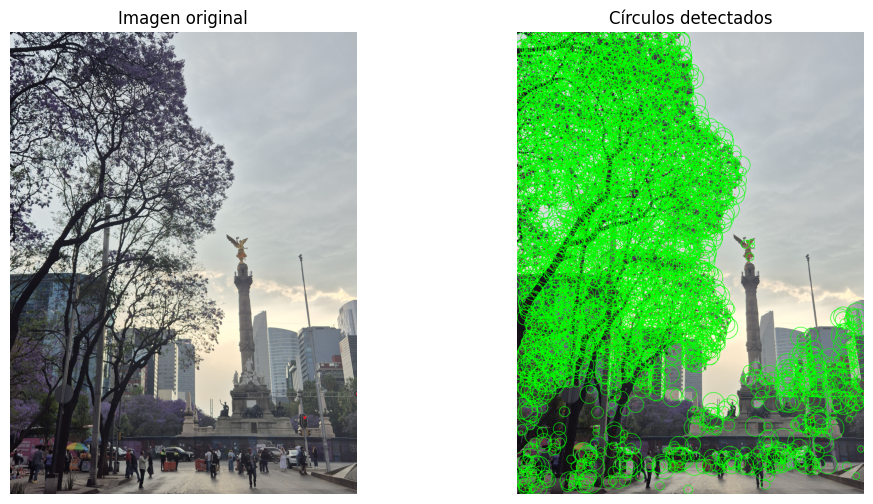

In [7]:
# Imagen procesada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(salida, cv2.COLOR_BGR2RGB))
plt.title("Círculos detectados")
plt.axis("off")

plt.show()

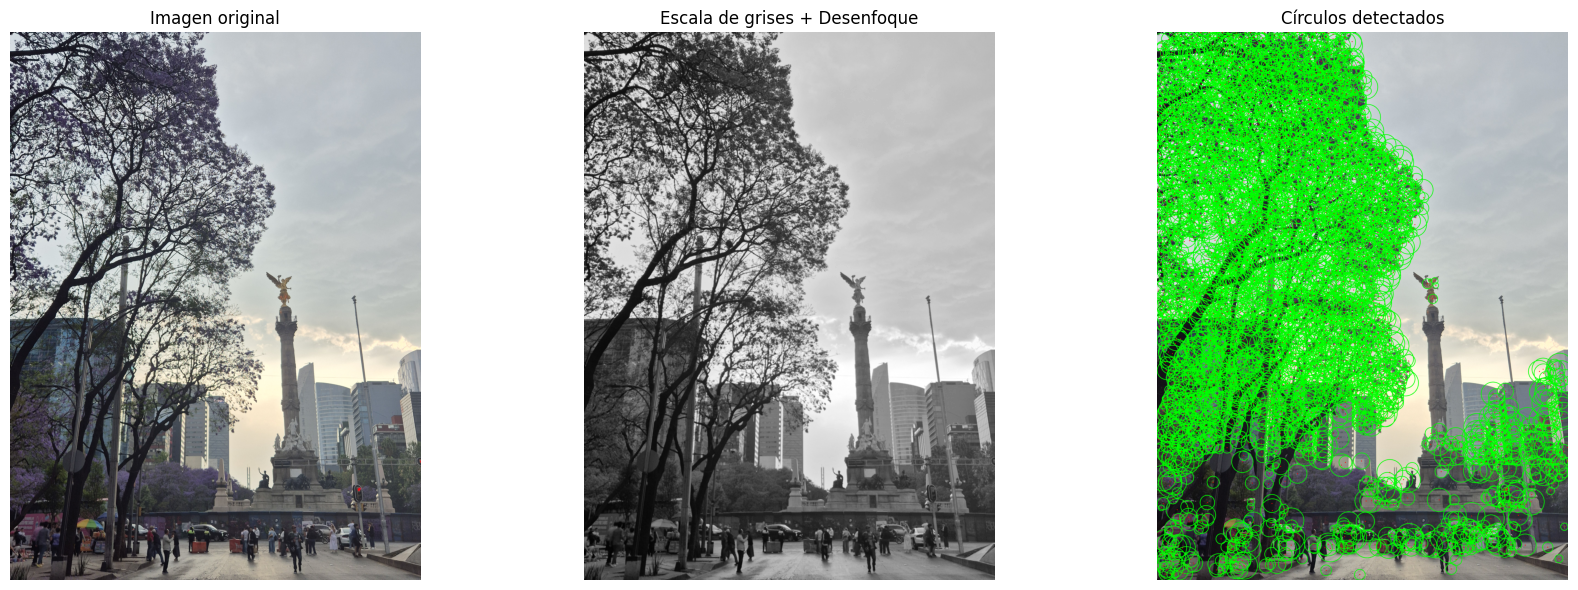

In [8]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(desenfocada, cmap='gray')
plt.title("Escala de grises + Desenfoque")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(salida, cv2.COLOR_BGR2RGB))
plt.title("Círculos detectados")
plt.axis("off")

plt.tight_layout()
plt.show()

In [9]:
cv2.imwrite("imagen_original.png", imagen)
cv2.imwrite("imagen_desenfocada.png", desenfocada)
cv2.imwrite("imagen_circulos.png", salida)

True